In [2]:
import json
import gensim
import logging
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

ubuntu_path = '/home/arnab/Desktop/Thesis Ubuntu/'
windows_path = 'C:/Users/User/Desktop/Thesis_Windows/'

root_path = windows_path

C:\Users\User\Anaconda3\envs\tensorflow-gpu\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
file_name = root_path + 'Dataset_preprocessed/Corpus_2.json'
with open(file_name) as f:
    news = json.load(f)
    print('loaded',file_name,' :: ' , len(news) , 'articles')

loaded /home/arnab/Desktop/Thesis Ubuntu/Dataset_preprocessed/Corpus_2.json  ::  102097 articles


In [2]:
kaler_kantho_path = root_path + 'Dataset_preprocessed/News_Papers/Kaler_kantha_preprocessed/kaler_kantha_out_'
news = []
for i in range(1 , 7):
    file_name = kaler_kantho_path + str(i) + '.json'
    with open(file_name) as f:
        curr = json.load(f)
        news = news + curr
        print('loaded',file_name,' :: ' , len(curr) , 'articles')

print(' ====> Dataset loading completed :: ' , len(news) , 'articles')

loaded C:/Users/User/Desktop/Thesis_Windows/Dataset_preprocessed/News_Papers/Kaler_kantha_preprocessed/kaler_kantha_out_1.json  ::  49997 articles
loaded C:/Users/User/Desktop/Thesis_Windows/Dataset_preprocessed/News_Papers/Kaler_kantha_preprocessed/kaler_kantha_out_2.json  ::  49999 articles
loaded C:/Users/User/Desktop/Thesis_Windows/Dataset_preprocessed/News_Papers/Kaler_kantha_preprocessed/kaler_kantha_out_3.json  ::  50000 articles
loaded C:/Users/User/Desktop/Thesis_Windows/Dataset_preprocessed/News_Papers/Kaler_kantha_preprocessed/kaler_kantha_out_4.json  ::  50000 articles
loaded C:/Users/User/Desktop/Thesis_Windows/Dataset_preprocessed/News_Papers/Kaler_kantha_preprocessed/kaler_kantha_out_5.json  ::  50000 articles
loaded C:/Users/User/Desktop/Thesis_Windows/Dataset_preprocessed/News_Papers/Kaler_kantha_preprocessed/kaler_kantha_out_6.json  ::  28739 articles
 ====> Dataset loading completed ::  278735 articles


In [3]:
news[0]

{'body': 'পরি অধিদপ্তর নিয়োগ অনিয়ম তদন্ গঠিত তদন্ত কমি অনিয়ম হ দা পরি জলবায়ু পরিবর্তন মন্ত্রণাল সম্পর্কিত সংসদী স্থায়ী কমি কমি বৈঠ এ ক্ষোভ প্রকাশ পাশাপাশি অনিয়ম জড়িত সকল বিরুদ্ধ কার্যক ব্যবস্থা গ্রহণ সুপারিশ হ গতকাল মঙ্গল বিকাল জাতী সংসদ ভবন অনুষ্ঠিত বৈঠ সভাপতিত্ব কমি সভাপতি ড. মোহাম্মদ হাছান মাহমুদ বৈঠ কমি সদস্য মন্ত্রী ব্যারিস্ আনিসুল ইসলাম মাহমুদ উপমন্ত্রী আবদুল্লাহ আল ইসলাম জ্যাকব নবী নেওয়াজ মো. ইয়াহ্ইয়া চৌধুরী টিপু সুলতান সংশ্লিষ্ট কর্মকর্ উপস্থিত বৈঠক শাষ কমি সভাপতি হাছান মাহমুদ সাংবাদিকদ পরি অধিদপ্তর নিয়োগ অনিয়ম তদন্ গঠিত কমি অনিয়ম হ তদন্ত কমি বল অনিয়ম হয়নি চা দে নাম অর্থ দাবী প্রমাণ অর্থ দাবী হ কল রেকর্ড আরো সংসদী কমি বিষ সংশ্লিষ্টদ শুন মন্ত্রণাল কার্যক ব্যবস্থা হ কমি সূত্ জানা গত বছর ২৯ নভেম্ব পরি অধিদপ্তর ৪৯ অফ সহায়ক ১২ নিরাপত্ কর্মী ৬ পরিচ্ছন্ন কর্মী নিয়োগ পত্রিকা বিজ্ঞাপন দরপত্ আহবান পিমা অ্যাসোসিয়েটস নাম প্রতিষ্ঠান ৬৭ জনবল নিয়োগ চুক্তি চলতি বছর ৩০ জানুয়ারি সংসদী কমি বৈঠ নিয়োগ অনিয়ম অভিযোগ উত্থাপন কমি অভিযোগ পা প্রতিষ্ঠান চা দে নাম চা প্রার্থীদ অর্থ দাবী ছাড়া প্রতিষ্ঠান যথা

In [4]:
# data = ["I love machine learning. Its awesome.",
#         "I love coding in python",
#         "I love building chatbots",
#         "they chat amagingly well"]

# tagged_data = [TaggedDocument(words=word_tokenize(_d), tags=[str(i)]) for i, _d in enumerate(data)]
tagged_data = []
cnt = 0
for article in news:
#     nws = TaggedDocument(words = word_tokenize(article['body']) , tags = [article['category'] , article['file_name']])
    nws = TaggedDocument(words = word_tokenize(article['body']) , tags = ['lala' , 'yoyo'])
    tagged_data.append(nws)
    cnt += 1
    if(cnt % 10000 == 0):
        print("processed {} articles of {} articles".format(cnt , len(news)))
    if(cnt == 273000):
        break
print('processing completed')

processed 10000 articles of 278735 articles
processed 20000 articles of 278735 articles
processed 30000 articles of 278735 articles
processed 40000 articles of 278735 articles
processed 50000 articles of 278735 articles
processed 60000 articles of 278735 articles
processed 70000 articles of 278735 articles
processed 80000 articles of 278735 articles
processed 90000 articles of 278735 articles
processed 100000 articles of 278735 articles
processed 110000 articles of 278735 articles
processed 120000 articles of 278735 articles
processed 130000 articles of 278735 articles
processed 140000 articles of 278735 articles
processed 150000 articles of 278735 articles
processed 160000 articles of 278735 articles
processed 170000 articles of 278735 articles
processed 180000 articles of 278735 articles
processed 190000 articles of 278735 articles
processed 200000 articles of 278735 articles
processed 210000 articles of 278735 articles
processed 220000 articles of 278735 articles
processed 230000 ar

In [5]:
print(tagged_data[0])

TaggedDocument(['পরি', 'অধিদপ্তর', 'নিয়োগ', 'অনিয়ম', 'তদন্', 'গঠিত', 'তদন্ত', 'কমি', 'অনিয়ম', 'হ', 'দা', 'পরি', 'জলবায়ু', 'পরিবর্তন', 'মন্ত্রণাল', 'সম্পর্কিত', 'সংসদী', 'স্থায়ী', 'কমি', 'কমি', 'বৈঠ', 'এ', 'ক্ষোভ', 'প্রকাশ', 'পাশাপাশি', 'অনিয়ম', 'জড়িত', 'সকল', 'বিরুদ্ধ', 'কার্যক', 'ব্যবস্থা', 'গ্রহণ', 'সুপারিশ', 'হ', 'গতকাল', 'মঙ্গল', 'বিকাল', 'জাতী', 'সংসদ', 'ভবন', 'অনুষ্ঠিত', 'বৈঠ', 'সভাপতিত্ব', 'কমি', 'সভাপতি', 'ড', '.', 'মোহাম্মদ', 'হাছান', 'মাহমুদ', 'বৈঠ', 'কমি', 'সদস্য', 'মন্ত্রী', 'ব্যারিস্', 'আনিসুল', 'ইসলাম', 'মাহমুদ', 'উপমন্ত্রী', 'আবদুল্লাহ', 'আল', 'ইসলাম', 'জ্যাকব', 'নবী', 'নেওয়াজ', 'মো', '.', 'ইয়াহ্ইয়া', 'চৌধুরী', 'টিপু', 'সুলতান', 'সংশ্লিষ্ট', 'কর্মকর্', 'উপস্থিত', 'বৈঠক', 'শাষ', 'কমি', 'সভাপতি', 'হাছান', 'মাহমুদ', 'সাংবাদিকদ', 'পরি', 'অধিদপ্তর', 'নিয়োগ', 'অনিয়ম', 'তদন্', 'গঠিত', 'কমি', 'অনিয়ম', 'হ', 'তদন্ত', 'কমি', 'বল', 'অনিয়ম', 'হয়নি', 'চা', 'দে', 'নাম', 'অর্থ', 'দাবী', 'প্রমাণ', 'অর্থ', 'দাবী', 'হ', 'কল', 'রেকর্ড', 'আরো', 'সংসদী', 'কমি', 'বিষ', 'সংশ্লিষ্টদ', 'শুন', 'মন

In [6]:
# word_tokenize(news[0]['body'])

In [7]:
TaggedDocument(words = word_tokenize(news[0]['body']) , tags = ['lala' , 'yoyo'])

TaggedDocument(words=['পরি', 'অধিদপ্তর', 'নিয়োগ', 'অনিয়ম', 'তদন্', 'গঠিত', 'তদন্ত', 'কমি', 'অনিয়ম', 'হ', 'দা', 'পরি', 'জলবায়ু', 'পরিবর্তন', 'মন্ত্রণাল', 'সম্পর্কিত', 'সংসদী', 'স্থায়ী', 'কমি', 'কমি', 'বৈঠ', 'এ', 'ক্ষোভ', 'প্রকাশ', 'পাশাপাশি', 'অনিয়ম', 'জড়িত', 'সকল', 'বিরুদ্ধ', 'কার্যক', 'ব্যবস্থা', 'গ্রহণ', 'সুপারিশ', 'হ', 'গতকাল', 'মঙ্গল', 'বিকাল', 'জাতী', 'সংসদ', 'ভবন', 'অনুষ্ঠিত', 'বৈঠ', 'সভাপতিত্ব', 'কমি', 'সভাপতি', 'ড', '.', 'মোহাম্মদ', 'হাছান', 'মাহমুদ', 'বৈঠ', 'কমি', 'সদস্য', 'মন্ত্রী', 'ব্যারিস্', 'আনিসুল', 'ইসলাম', 'মাহমুদ', 'উপমন্ত্রী', 'আবদুল্লাহ', 'আল', 'ইসলাম', 'জ্যাকব', 'নবী', 'নেওয়াজ', 'মো', '.', 'ইয়াহ্ইয়া', 'চৌধুরী', 'টিপু', 'সুলতান', 'সংশ্লিষ্ট', 'কর্মকর্', 'উপস্থিত', 'বৈঠক', 'শাষ', 'কমি', 'সভাপতি', 'হাছান', 'মাহমুদ', 'সাংবাদিকদ', 'পরি', 'অধিদপ্তর', 'নিয়োগ', 'অনিয়ম', 'তদন্', 'গঠিত', 'কমি', 'অনিয়ম', 'হ', 'তদন্ত', 'কমি', 'বল', 'অনিয়ম', 'হয়নি', 'চা', 'দে', 'নাম', 'অর্থ', 'দাবী', 'প্রমাণ', 'অর্থ', 'দাবী', 'হ', 'কল', 'রেকর্ড', 'আরো', 'সংসদী', 'কমি', 'বিষ', 'সংশ্লিষ্টদ', 'শুন

In [8]:
# max_epochs = 100
# vec_size = 150
# alpha = 0.025

# model = Doc2Vec(size=vec_size,
#                 alpha=alpha, 
#                 min_alpha=0.00025,
#                 min_count=1,
#                 dm =1)
  
# model.build_vocab(tagged_data)

# for epoch in range(max_epochs):
#     print('iteration {0}'.format(epoch))
#     model.train(tagged_data,
#                 total_examples=model.corpus_count,
#                 epochs=model.iter)
#     # decrease the learning rate
#     model.alpha -= 0.0002
#     # fix the learning rate, no decay
#     model.min_alpha = model.alpha

# model.save("d2v2.model")
# print("Model Saved")

In [8]:
model = Doc2Vec(tagged_data, vector_size=300, window=10, min_count=1, workers=10)
model.train(tagged_data,total_examples=len(tagged_data),epochs=20)
print("model training completed")

2018-08-19 13:28:17,191 : INFO : collecting all words and their counts
2018-08-19 13:28:17,191 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2018-08-19 13:28:17,736 : INFO : PROGRESS: at example #10000, processed 1205969 words (2212270/s), 59954 word types, 2 tags
2018-08-19 13:28:18,254 : INFO : PROGRESS: at example #20000, processed 2504613 words (2521600/s), 95974 word types, 2 tags
2018-08-19 13:28:18,915 : INFO : PROGRESS: at example #30000, processed 4172553 words (2543165/s), 125872 word types, 2 tags
2018-08-19 13:28:19,469 : INFO : PROGRESS: at example #40000, processed 5724324 words (2778619/s), 148404 word types, 2 tags
2018-08-19 13:28:20,049 : INFO : PROGRESS: at example #50000, processed 7247452 words (2603361/s), 166315 word types, 2 tags
2018-08-19 13:28:20,773 : INFO : PROGRESS: at example #60000, processed 9047194 words (2527624/s), 205207 word types, 2 tags
2018-08-19 13:28:21,357 : INFO : PROGRESS: at example #70000, processed 10433

2018-08-19 13:29:20,662 : INFO : EPOCH 1 - PROGRESS: at 27.09% examples, 321248 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:29:21,700 : INFO : EPOCH 1 - PROGRESS: at 28.04% examples, 321544 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:29:22,733 : INFO : EPOCH 1 - PROGRESS: at 29.02% examples, 322663 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:29:23,748 : INFO : EPOCH 1 - PROGRESS: at 29.86% examples, 322277 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:29:24,749 : INFO : EPOCH 1 - PROGRESS: at 30.77% examples, 322740 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:29:25,776 : INFO : EPOCH 1 - PROGRESS: at 31.71% examples, 323043 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:29:26,833 : INFO : EPOCH 1 - PROGRESS: at 32.68% examples, 323358 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:29:27,857 : INFO : EPOCH 1 - PROGRESS: at 33.65% examples, 323607 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:29:28,871 : INFO : EPOCH 1 - PROGRESS: at 34.58% examples, 324276 words/s,

2018-08-19 13:30:34,579 : INFO : EPOCH 1 - PROGRESS: at 90.32% examples, 334286 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:30:35,618 : INFO : EPOCH 1 - PROGRESS: at 91.30% examples, 334406 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:30:36,650 : INFO : EPOCH 1 - PROGRESS: at 92.17% examples, 334145 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:30:37,681 : INFO : EPOCH 1 - PROGRESS: at 93.07% examples, 333960 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:30:38,673 : INFO : EPOCH 1 - PROGRESS: at 93.94% examples, 333613 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:30:39,840 : INFO : EPOCH 1 - PROGRESS: at 94.90% examples, 333142 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:30:40,853 : INFO : EPOCH 1 - PROGRESS: at 95.87% examples, 333197 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:30:41,871 : INFO : EPOCH 1 - PROGRESS: at 96.81% examples, 333340 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:30:42,895 : INFO : EPOCH 1 - PROGRESS: at 97.54% examples, 333475 words/s,

2018-08-19 13:31:40,540 : INFO : EPOCH 2 - PROGRESS: at 45.24% examples, 340367 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:31:41,537 : INFO : EPOCH 2 - PROGRESS: at 45.84% examples, 339146 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:31:42,629 : INFO : EPOCH 2 - PROGRESS: at 46.52% examples, 338172 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:31:43,620 : INFO : EPOCH 2 - PROGRESS: at 47.18% examples, 338394 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:31:44,642 : INFO : EPOCH 2 - PROGRESS: at 47.89% examples, 337402 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:31:45,676 : INFO : EPOCH 2 - PROGRESS: at 48.88% examples, 337091 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:31:46,798 : INFO : EPOCH 2 - PROGRESS: at 50.05% examples, 337390 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:31:47,838 : INFO : EPOCH 2 - PROGRESS: at 51.20% examples, 337895 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:31:48,852 : INFO : EPOCH 2 - PROGRESS: at 52.28% examples, 337779 words/s,

2018-08-19 13:32:45,445 : INFO : EPOCH - 2 : training on 40467644 raw words (40099029 effective words) took 118.7s, 337853 effective words/s
2018-08-19 13:32:46,483 : INFO : EPOCH 3 - PROGRESS: at 0.97% examples, 286817 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:32:47,493 : INFO : EPOCH 3 - PROGRESS: at 1.98% examples, 313641 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:32:48,533 : INFO : EPOCH 3 - PROGRESS: at 3.00% examples, 319692 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:32:49,543 : INFO : EPOCH 3 - PROGRESS: at 4.08% examples, 327361 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:32:50,572 : INFO : EPOCH 3 - PROGRESS: at 5.14% examples, 327593 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:32:51,619 : INFO : EPOCH 3 - PROGRESS: at 6.25% examples, 329414 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:32:52,636 : INFO : EPOCH 3 - PROGRESS: at 7.14% examples, 334293 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:32:53,657 : INFO : EPOCH 3 - PROGRESS: at 7.95% exampl

2018-08-19 13:33:59,394 : INFO : EPOCH 3 - PROGRESS: at 60.76% examples, 334704 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:34:00,399 : INFO : EPOCH 3 - PROGRESS: at 61.62% examples, 335057 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:34:01,477 : INFO : EPOCH 3 - PROGRESS: at 62.39% examples, 334273 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:34:02,483 : INFO : EPOCH 3 - PROGRESS: at 63.29% examples, 334361 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:34:03,533 : INFO : EPOCH 3 - PROGRESS: at 64.25% examples, 334419 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:34:04,546 : INFO : EPOCH 3 - PROGRESS: at 65.23% examples, 334692 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:34:05,554 : INFO : EPOCH 3 - PROGRESS: at 66.21% examples, 334845 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:34:06,583 : INFO : EPOCH 3 - PROGRESS: at 67.04% examples, 334463 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:34:07,598 : INFO : EPOCH 3 - PROGRESS: at 68.01% examples, 334758 words/s,

2018-08-19 13:35:04,491 : INFO : EPOCH 4 - PROGRESS: at 19.20% examples, 354483 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:35:05,510 : INFO : EPOCH 4 - PROGRESS: at 19.94% examples, 354954 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:35:06,519 : INFO : EPOCH 4 - PROGRESS: at 20.74% examples, 354806 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:35:07,538 : INFO : EPOCH 4 - PROGRESS: at 21.42% examples, 356639 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:35:08,577 : INFO : EPOCH 4 - PROGRESS: at 22.39% examples, 355817 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:35:09,592 : INFO : EPOCH 4 - PROGRESS: at 23.28% examples, 355580 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:35:10,609 : INFO : EPOCH 4 - PROGRESS: at 24.26% examples, 355852 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:35:11,624 : INFO : EPOCH 4 - PROGRESS: at 25.19% examples, 355189 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:35:12,657 : INFO : EPOCH 4 - PROGRESS: at 26.22% examples, 355733 words/s,

2018-08-19 13:36:18,536 : INFO : EPOCH 4 - PROGRESS: at 84.50% examples, 353059 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:36:19,573 : INFO : EPOCH 4 - PROGRESS: at 85.31% examples, 353054 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:36:20,603 : INFO : EPOCH 4 - PROGRESS: at 86.16% examples, 353382 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:36:21,629 : INFO : EPOCH 4 - PROGRESS: at 86.92% examples, 353184 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:36:22,687 : INFO : EPOCH 4 - PROGRESS: at 88.01% examples, 353308 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:36:23,691 : INFO : EPOCH 4 - PROGRESS: at 88.93% examples, 353008 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:36:24,682 : INFO : EPOCH 4 - PROGRESS: at 90.00% examples, 353116 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:36:25,691 : INFO : EPOCH 4 - PROGRESS: at 90.93% examples, 353012 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:36:26,718 : INFO : EPOCH 4 - PROGRESS: at 91.90% examples, 352934 words/s,

2018-08-19 13:37:23,666 : INFO : EPOCH 5 - PROGRESS: at 39.78% examples, 339591 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:37:24,715 : INFO : EPOCH 5 - PROGRESS: at 40.73% examples, 340435 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:37:25,707 : INFO : EPOCH 5 - PROGRESS: at 41.61% examples, 340867 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:37:26,724 : INFO : EPOCH 5 - PROGRESS: at 42.51% examples, 341426 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:37:27,744 : INFO : EPOCH 5 - PROGRESS: at 43.46% examples, 342138 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:37:28,744 : INFO : EPOCH 5 - PROGRESS: at 44.39% examples, 342924 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:37:29,741 : INFO : EPOCH 5 - PROGRESS: at 45.21% examples, 343614 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:37:30,791 : INFO : EPOCH 5 - PROGRESS: at 46.01% examples, 343831 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:37:31,820 : INFO : EPOCH 5 - PROGRESS: at 46.83% examples, 344540 words/s,

2018-08-19 13:38:30,517 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-08-19 13:38:30,525 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-08-19 13:38:30,529 : INFO : EPOCH - 5 : training on 40467644 raw words (40097842 effective words) took 114.0s, 351745 effective words/s
2018-08-19 13:38:30,529 : INFO : training on a 202338220 raw words (200489375 effective words) took 583.8s, 343414 effective words/s
2018-08-19 13:38:30,533 : WARNING : Effective 'alpha' higher than previous training cycles
2018-08-19 13:38:30,537 : INFO : training model with 10 workers on 422660 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2018-08-19 13:38:31,617 : INFO : EPOCH 1 - PROGRESS: at 0.97% examples, 276591 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:38:32,616 : INFO : EPOCH 1 - PROGRESS: at 2.07% examples, 322520 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:38:33,638 : INFO : EPOCH 1 - PROGRESS: at 3.03% examples, 32

2018-08-19 13:39:39,458 : INFO : EPOCH 1 - PROGRESS: at 59.32% examples, 349277 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:39:40,501 : INFO : EPOCH 1 - PROGRESS: at 60.14% examples, 349188 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:39:41,502 : INFO : EPOCH 1 - PROGRESS: at 60.86% examples, 349472 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:39:42,511 : INFO : EPOCH 1 - PROGRESS: at 61.72% examples, 349501 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:39:43,526 : INFO : EPOCH 1 - PROGRESS: at 62.62% examples, 349434 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:39:44,553 : INFO : EPOCH 1 - PROGRESS: at 63.61% examples, 349618 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:39:45,562 : INFO : EPOCH 1 - PROGRESS: at 64.60% examples, 349770 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:39:46,595 : INFO : EPOCH 1 - PROGRESS: at 65.53% examples, 349624 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:39:47,601 : INFO : EPOCH 1 - PROGRESS: at 66.53% examples, 349648 words/s,

2018-08-19 13:40:44,231 : INFO : EPOCH 2 - PROGRESS: at 17.97% examples, 363473 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:40:45,245 : INFO : EPOCH 2 - PROGRESS: at 18.81% examples, 364093 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:40:46,260 : INFO : EPOCH 2 - PROGRESS: at 19.54% examples, 364832 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:40:47,263 : INFO : EPOCH 2 - PROGRESS: at 20.33% examples, 364989 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:40:48,270 : INFO : EPOCH 2 - PROGRESS: at 21.14% examples, 366070 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:40:49,265 : INFO : EPOCH 2 - PROGRESS: at 21.88% examples, 366525 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:40:50,306 : INFO : EPOCH 2 - PROGRESS: at 22.93% examples, 366636 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:40:51,355 : INFO : EPOCH 2 - PROGRESS: at 23.95% examples, 366758 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:40:52,454 : INFO : EPOCH 2 - PROGRESS: at 25.00% examples, 366483 words/s,

2018-08-19 13:41:57,663 : INFO : EPOCH 2 - PROGRESS: at 83.27% examples, 357966 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:41:58,670 : INFO : EPOCH 2 - PROGRESS: at 84.13% examples, 357992 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:41:59,714 : INFO : EPOCH 2 - PROGRESS: at 84.94% examples, 357720 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:42:00,722 : INFO : EPOCH 2 - PROGRESS: at 85.73% examples, 357820 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:42:01,758 : INFO : EPOCH 2 - PROGRESS: at 86.47% examples, 357394 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:42:02,822 : INFO : EPOCH 2 - PROGRESS: at 87.20% examples, 356672 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:42:03,965 : INFO : EPOCH 2 - PROGRESS: at 88.34% examples, 356535 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:42:04,981 : INFO : EPOCH 2 - PROGRESS: at 89.34% examples, 356600 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:42:05,996 : INFO : EPOCH 2 - PROGRESS: at 90.29% examples, 356194 words/s,

2018-08-19 13:43:02,653 : INFO : EPOCH 3 - PROGRESS: at 38.71% examples, 344404 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:43:03,669 : INFO : EPOCH 3 - PROGRESS: at 39.42% examples, 343902 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:43:04,718 : INFO : EPOCH 3 - PROGRESS: at 40.28% examples, 343726 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:43:05,722 : INFO : EPOCH 3 - PROGRESS: at 41.21% examples, 344296 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:43:06,729 : INFO : EPOCH 3 - PROGRESS: at 42.12% examples, 345167 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:43:07,744 : INFO : EPOCH 3 - PROGRESS: at 42.89% examples, 344512 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:43:08,778 : INFO : EPOCH 3 - PROGRESS: at 43.79% examples, 344612 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:43:09,805 : INFO : EPOCH 3 - PROGRESS: at 44.71% examples, 345416 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:43:10,808 : INFO : EPOCH 3 - PROGRESS: at 45.49% examples, 345814 words/s,

2018-08-19 13:44:09,577 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-08-19 13:44:09,581 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-08-19 13:44:09,585 : INFO : EPOCH - 3 : training on 40467644 raw words (40096881 effective words) took 112.0s, 357886 effective words/s
2018-08-19 13:44:10,614 : INFO : EPOCH 4 - PROGRESS: at 0.97% examples, 286885 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:44:11,642 : INFO : EPOCH 4 - PROGRESS: at 2.01% examples, 316611 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:44:12,681 : INFO : EPOCH 4 - PROGRESS: at 3.06% examples, 325517 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:44:13,732 : INFO : EPOCH 4 - PROGRESS: at 4.16% examples, 330985 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:44:14,732 : INFO : EPOCH 4 - PROGRESS: at 5.30% examples, 335015 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:44:15,758 : INFO : EPOCH 4 - PROGRESS: at 6.33% examples, 333484 words/s, in_qsize 19, out_qsize 0

2018-08-19 13:45:22,221 : INFO : EPOCH 4 - PROGRESS: at 61.62% examples, 345730 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:45:23,249 : INFO : EPOCH 4 - PROGRESS: at 62.54% examples, 345790 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:45:24,266 : INFO : EPOCH 4 - PROGRESS: at 63.46% examples, 345733 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:45:25,358 : INFO : EPOCH 4 - PROGRESS: at 64.50% examples, 345787 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:45:26,378 : INFO : EPOCH 4 - PROGRESS: at 65.48% examples, 346008 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:45:27,414 : INFO : EPOCH 4 - PROGRESS: at 66.56% examples, 346318 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:45:28,419 : INFO : EPOCH 4 - PROGRESS: at 67.48% examples, 346314 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:45:29,465 : INFO : EPOCH 4 - PROGRESS: at 68.47% examples, 346320 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:45:30,472 : INFO : EPOCH 4 - PROGRESS: at 69.43% examples, 346501 words/s,

2018-08-19 13:46:27,055 : INFO : EPOCH 5 - PROGRESS: at 18.94% examples, 346863 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:46:28,055 : INFO : EPOCH 5 - PROGRESS: at 19.66% examples, 348232 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:46:29,071 : INFO : EPOCH 5 - PROGRESS: at 20.51% examples, 349553 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:46:30,071 : INFO : EPOCH 5 - PROGRESS: at 21.29% examples, 351606 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:46:31,133 : INFO : EPOCH 5 - PROGRESS: at 22.15% examples, 351795 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:46:32,195 : INFO : EPOCH 5 - PROGRESS: at 23.18% examples, 352423 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:46:33,195 : INFO : EPOCH 5 - PROGRESS: at 24.21% examples, 353757 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:46:34,273 : INFO : EPOCH 5 - PROGRESS: at 25.27% examples, 354268 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:46:35,289 : INFO : EPOCH 5 - PROGRESS: at 26.34% examples, 355693 words/s,

2018-08-19 13:47:40,753 : INFO : EPOCH 5 - PROGRESS: at 85.41% examples, 358381 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:47:41,769 : INFO : EPOCH 5 - PROGRESS: at 86.12% examples, 358029 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:47:42,785 : INFO : EPOCH 5 - PROGRESS: at 86.84% examples, 357513 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:47:43,816 : INFO : EPOCH 5 - PROGRESS: at 87.74% examples, 357258 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:47:44,847 : INFO : EPOCH 5 - PROGRESS: at 88.85% examples, 357402 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:47:45,862 : INFO : EPOCH 5 - PROGRESS: at 89.97% examples, 357627 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:47:46,862 : INFO : EPOCH 5 - PROGRESS: at 90.93% examples, 357584 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:47:47,862 : INFO : EPOCH 5 - PROGRESS: at 91.90% examples, 357516 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:47:48,894 : INFO : EPOCH 5 - PROGRESS: at 93.00% examples, 357781 words/s,

2018-08-19 13:48:45,296 : INFO : EPOCH 6 - PROGRESS: at 44.27% examples, 370640 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:48:46,327 : INFO : EPOCH 6 - PROGRESS: at 45.11% examples, 370608 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:48:47,358 : INFO : EPOCH 6 - PROGRESS: at 45.97% examples, 371047 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:48:48,374 : INFO : EPOCH 6 - PROGRESS: at 46.73% examples, 370727 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:48:49,374 : INFO : EPOCH 6 - PROGRESS: at 47.47% examples, 371030 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:48:50,389 : INFO : EPOCH 6 - PROGRESS: at 48.62% examples, 371202 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:48:51,421 : INFO : EPOCH 6 - PROGRESS: at 49.75% examples, 371236 words/s, in_qsize 20, out_qsize 1
2018-08-19 13:48:52,452 : INFO : EPOCH 6 - PROGRESS: at 50.88% examples, 371109 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:48:53,483 : INFO : EPOCH 6 - PROGRESS: at 52.07% examples, 370894 words/s,

2018-08-19 13:49:50,135 : INFO : EPOCH 7 - PROGRESS: at 5.67% examples, 352740 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:49:51,182 : INFO : EPOCH 7 - PROGRESS: at 6.81% examples, 355943 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:49:52,198 : INFO : EPOCH 7 - PROGRESS: at 7.63% examples, 360227 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:49:53,260 : INFO : EPOCH 7 - PROGRESS: at 8.52% examples, 362019 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:49:54,276 : INFO : EPOCH 7 - PROGRESS: at 9.39% examples, 364293 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:49:55,276 : INFO : EPOCH 7 - PROGRESS: at 10.26% examples, 366663 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:49:56,291 : INFO : EPOCH 7 - PROGRESS: at 11.07% examples, 367660 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:49:57,354 : INFO : EPOCH 7 - PROGRESS: at 11.97% examples, 368040 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:49:58,385 : INFO : EPOCH 7 - PROGRESS: at 12.92% examples, 368952 words/s, in_q

2018-08-19 13:51:03,896 : INFO : EPOCH 7 - PROGRESS: at 72.53% examples, 368990 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:51:04,927 : INFO : EPOCH 7 - PROGRESS: at 73.59% examples, 368870 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:51:05,974 : INFO : EPOCH 7 - PROGRESS: at 74.73% examples, 369082 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:51:06,974 : INFO : EPOCH 7 - PROGRESS: at 75.79% examples, 369347 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:51:07,974 : INFO : EPOCH 7 - PROGRESS: at 76.81% examples, 369369 words/s, in_qsize 20, out_qsize 1
2018-08-19 13:51:08,990 : INFO : EPOCH 7 - PROGRESS: at 77.95% examples, 369468 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:51:10,005 : INFO : EPOCH 7 - PROGRESS: at 79.09% examples, 369664 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:51:11,021 : INFO : EPOCH 7 - PROGRESS: at 80.05% examples, 369606 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:51:12,068 : INFO : EPOCH 7 - PROGRESS: at 80.91% examples, 369683 words/s,

2018-08-19 13:52:09,283 : INFO : EPOCH 8 - PROGRESS: at 33.90% examples, 369273 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:52:10,298 : INFO : EPOCH 8 - PROGRESS: at 34.75% examples, 368753 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:52:11,345 : INFO : EPOCH 8 - PROGRESS: at 35.53% examples, 368116 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:52:12,360 : INFO : EPOCH 8 - PROGRESS: at 36.22% examples, 366284 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:52:13,376 : INFO : EPOCH 8 - PROGRESS: at 37.06% examples, 366559 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:52:14,376 : INFO : EPOCH 8 - PROGRESS: at 37.85% examples, 366202 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:52:15,391 : INFO : EPOCH 8 - PROGRESS: at 38.67% examples, 366515 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:52:16,454 : INFO : EPOCH 8 - PROGRESS: at 39.33% examples, 364423 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:52:17,548 : INFO : EPOCH 8 - PROGRESS: at 40.16% examples, 363305 words/s,

2018-08-19 13:53:23,090 : INFO : worker thread finished; awaiting finish of 9 more threads
2018-08-19 13:53:23,137 : INFO : worker thread finished; awaiting finish of 8 more threads
2018-08-19 13:53:23,153 : INFO : worker thread finished; awaiting finish of 7 more threads
2018-08-19 13:53:23,168 : INFO : worker thread finished; awaiting finish of 6 more threads
2018-08-19 13:53:23,168 : INFO : worker thread finished; awaiting finish of 5 more threads
2018-08-19 13:53:23,168 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-08-19 13:53:23,184 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-08-19 13:53:23,184 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-08-19 13:53:23,215 : INFO : EPOCH 8 - PROGRESS: at 99.98% examples, 363846 words/s, in_qsize 1, out_qsize 1
2018-08-19 13:53:23,231 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-08-19 13:53:23,231 : INFO : worker thread finished; awaiting fi

2018-08-19 13:54:28,111 : INFO : EPOCH 9 - PROGRESS: at 56.63% examples, 352359 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:54:29,121 : INFO : EPOCH 9 - PROGRESS: at 57.36% examples, 352458 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:54:30,126 : INFO : EPOCH 9 - PROGRESS: at 58.15% examples, 352426 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:54:31,150 : INFO : EPOCH 9 - PROGRESS: at 59.01% examples, 352485 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:54:32,147 : INFO : EPOCH 9 - PROGRESS: at 59.84% examples, 352647 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:54:33,148 : INFO : EPOCH 9 - PROGRESS: at 60.61% examples, 352937 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:54:34,228 : INFO : EPOCH 9 - PROGRESS: at 61.44% examples, 352845 words/s, in_qsize 18, out_qsize 1
2018-08-19 13:54:35,233 : INFO : EPOCH 9 - PROGRESS: at 62.36% examples, 352945 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:54:36,253 : INFO : EPOCH 9 - PROGRESS: at 63.35% examples, 353079 words/s,

2018-08-19 13:55:34,008 : INFO : EPOCH 10 - PROGRESS: at 12.16% examples, 323408 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:55:35,040 : INFO : EPOCH 10 - PROGRESS: at 12.99% examples, 324097 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:55:36,067 : INFO : EPOCH 10 - PROGRESS: at 13.88% examples, 325997 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:55:37,075 : INFO : EPOCH 10 - PROGRESS: at 14.70% examples, 327005 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:55:38,095 : INFO : EPOCH 10 - PROGRESS: at 15.57% examples, 327505 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:55:39,102 : INFO : EPOCH 10 - PROGRESS: at 16.44% examples, 329280 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:55:40,121 : INFO : EPOCH 10 - PROGRESS: at 17.29% examples, 329520 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:55:41,126 : INFO : EPOCH 10 - PROGRESS: at 18.08% examples, 329639 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:55:42,126 : INFO : EPOCH 10 - PROGRESS: at 18.85% examples, 330637

2018-08-19 13:56:47,602 : INFO : EPOCH 10 - PROGRESS: at 78.79% examples, 356281 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:56:48,627 : INFO : EPOCH 10 - PROGRESS: at 79.85% examples, 356520 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:56:49,644 : INFO : EPOCH 10 - PROGRESS: at 80.72% examples, 356874 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:56:50,651 : INFO : EPOCH 10 - PROGRESS: at 81.55% examples, 357046 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:56:51,670 : INFO : EPOCH 10 - PROGRESS: at 82.46% examples, 357225 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:56:52,681 : INFO : EPOCH 10 - PROGRESS: at 83.41% examples, 357477 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:56:53,735 : INFO : EPOCH 10 - PROGRESS: at 84.28% examples, 357591 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:56:54,738 : INFO : EPOCH 10 - PROGRESS: at 85.18% examples, 357972 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:56:55,737 : INFO : EPOCH 10 - PROGRESS: at 86.02% examples, 358297

2018-08-19 13:57:52,687 : INFO : EPOCH 11 - PROGRESS: at 36.20% examples, 351200 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:57:53,706 : INFO : EPOCH 11 - PROGRESS: at 37.04% examples, 351697 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:57:54,783 : INFO : EPOCH 11 - PROGRESS: at 37.85% examples, 351359 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:57:55,798 : INFO : EPOCH 11 - PROGRESS: at 38.67% examples, 351978 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:57:56,835 : INFO : EPOCH 11 - PROGRESS: at 39.47% examples, 351903 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:57:57,839 : INFO : EPOCH 11 - PROGRESS: at 40.35% examples, 352142 words/s, in_qsize 19, out_qsize 0
2018-08-19 13:57:58,844 : INFO : EPOCH 11 - PROGRESS: at 41.25% examples, 352316 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:57:59,850 : INFO : EPOCH 11 - PROGRESS: at 42.12% examples, 352594 words/s, in_qsize 20, out_qsize 0
2018-08-19 13:58:01,005 : INFO : EPOCH 11 - PROGRESS: at 42.96% examples, 351375

2018-08-19 13:59:05,862 : INFO : worker thread finished; awaiting finish of 8 more threads
2018-08-19 13:59:05,882 : INFO : EPOCH 11 - PROGRESS: at 99.90% examples, 350596 words/s, in_qsize 7, out_qsize 1
2018-08-19 13:59:05,882 : INFO : worker thread finished; awaiting finish of 7 more threads
2018-08-19 13:59:05,916 : INFO : worker thread finished; awaiting finish of 6 more threads
2018-08-19 13:59:05,916 : INFO : worker thread finished; awaiting finish of 5 more threads
2018-08-19 13:59:05,944 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-08-19 13:59:05,956 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-08-19 13:59:05,977 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-08-19 13:59:05,999 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-08-19 13:59:05,999 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-08-19 13:59:06,003 : INFO : EPOCH - 11 : training on 40467644 

2018-08-19 14:00:10,589 : INFO : EPOCH 12 - PROGRESS: at 58.79% examples, 369092 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:00:11,598 : INFO : EPOCH 12 - PROGRESS: at 59.58% examples, 368825 words/s, in_qsize 20, out_qsize 0
2018-08-19 14:00:12,603 : INFO : EPOCH 12 - PROGRESS: at 60.45% examples, 369030 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:00:13,612 : INFO : EPOCH 12 - PROGRESS: at 61.13% examples, 368550 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:00:14,624 : INFO : EPOCH 12 - PROGRESS: at 62.02% examples, 368270 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:00:15,659 : INFO : EPOCH 12 - PROGRESS: at 62.88% examples, 367540 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:00:16,674 : INFO : EPOCH 12 - PROGRESS: at 63.74% examples, 366839 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:00:17,697 : INFO : EPOCH 12 - PROGRESS: at 64.68% examples, 366391 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:00:18,728 : INFO : EPOCH 12 - PROGRESS: at 65.65% examples, 366200

2018-08-19 14:01:15,371 : INFO : EPOCH 13 - PROGRESS: at 15.25% examples, 342102 words/s, in_qsize 20, out_qsize 0
2018-08-19 14:01:16,401 : INFO : EPOCH 13 - PROGRESS: at 16.09% examples, 341785 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:01:17,423 : INFO : EPOCH 13 - PROGRESS: at 17.01% examples, 342898 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:01:18,452 : INFO : EPOCH 13 - PROGRESS: at 17.93% examples, 344360 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:01:19,459 : INFO : EPOCH 13 - PROGRESS: at 18.72% examples, 345086 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:01:20,471 : INFO : EPOCH 13 - PROGRESS: at 19.44% examples, 345794 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:01:21,465 : INFO : EPOCH 13 - PROGRESS: at 20.14% examples, 345563 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:01:22,480 : INFO : EPOCH 13 - PROGRESS: at 20.97% examples, 346984 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:01:23,470 : INFO : EPOCH 13 - PROGRESS: at 21.54% examples, 347365

2018-08-19 14:02:28,969 : INFO : EPOCH 13 - PROGRESS: at 81.32% examples, 356461 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:02:29,989 : INFO : EPOCH 13 - PROGRESS: at 82.23% examples, 356634 words/s, in_qsize 20, out_qsize 0
2018-08-19 14:02:31,019 : INFO : EPOCH 13 - PROGRESS: at 83.16% examples, 356908 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:02:32,064 : INFO : EPOCH 13 - PROGRESS: at 84.11% examples, 357185 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:02:33,080 : INFO : EPOCH 13 - PROGRESS: at 85.05% examples, 357619 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:02:34,101 : INFO : EPOCH 13 - PROGRESS: at 85.84% examples, 357723 words/s, in_qsize 20, out_qsize 0
2018-08-19 14:02:35,132 : INFO : EPOCH 13 - PROGRESS: at 86.71% examples, 357877 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:02:36,186 : INFO : EPOCH 13 - PROGRESS: at 87.74% examples, 358086 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:02:37,206 : INFO : EPOCH 13 - PROGRESS: at 88.68% examples, 357681

2018-08-19 14:03:33,880 : INFO : EPOCH 14 - PROGRESS: at 38.71% examples, 352821 words/s, in_qsize 18, out_qsize 1
2018-08-19 14:03:34,881 : INFO : EPOCH 14 - PROGRESS: at 39.45% examples, 352358 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:03:35,920 : INFO : EPOCH 14 - PROGRESS: at 40.25% examples, 351681 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:03:37,016 : INFO : EPOCH 14 - PROGRESS: at 41.10% examples, 350788 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:03:38,009 : INFO : EPOCH 14 - PROGRESS: at 41.99% examples, 351197 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:03:39,025 : INFO : EPOCH 14 - PROGRESS: at 42.87% examples, 351326 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:03:40,042 : INFO : EPOCH 14 - PROGRESS: at 43.77% examples, 351492 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:03:41,066 : INFO : EPOCH 14 - PROGRESS: at 44.58% examples, 351199 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:03:42,079 : INFO : EPOCH 14 - PROGRESS: at 45.38% examples, 351721

2018-08-19 14:04:43,675 : INFO : worker thread finished; awaiting finish of 6 more threads
2018-08-19 14:04:43,711 : INFO : worker thread finished; awaiting finish of 5 more threads
2018-08-19 14:04:43,743 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-08-19 14:04:43,747 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-08-19 14:04:43,767 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-08-19 14:04:43,771 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-08-19 14:04:43,775 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-08-19 14:04:43,779 : INFO : EPOCH - 14 : training on 40467644 raw words (40097241 effective words) took 113.9s, 351913 effective words/s
2018-08-19 14:04:44,850 : INFO : EPOCH 15 - PROGRESS: at 1.00% examples, 288072 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:04:45,888 : INFO : EPOCH 15 - PROGRESS: at 2.10% examples, 324894 words/s, in_qsize 19, out_q

2018-08-19 14:05:51,788 : INFO : EPOCH 15 - PROGRESS: at 58.20% examples, 346878 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:05:52,786 : INFO : EPOCH 15 - PROGRESS: at 59.10% examples, 347416 words/s, in_qsize 20, out_qsize 0
2018-08-19 14:05:53,798 : INFO : EPOCH 15 - PROGRESS: at 59.98% examples, 347901 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:05:54,797 : INFO : EPOCH 15 - PROGRESS: at 60.76% examples, 348515 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:05:55,811 : INFO : EPOCH 15 - PROGRESS: at 61.67% examples, 348960 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:05:56,817 : INFO : EPOCH 15 - PROGRESS: at 62.65% examples, 349364 words/s, in_qsize 20, out_qsize 0
2018-08-19 14:05:57,842 : INFO : EPOCH 15 - PROGRESS: at 63.66% examples, 349714 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:05:58,857 : INFO : EPOCH 15 - PROGRESS: at 64.73% examples, 350207 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:05:59,861 : INFO : EPOCH 15 - PROGRESS: at 65.81% examples, 350776

2018-08-19 14:06:56,590 : INFO : EPOCH 16 - PROGRESS: at 16.47% examples, 350913 words/s, in_qsize 20, out_qsize 0
2018-08-19 14:06:57,588 : INFO : EPOCH 16 - PROGRESS: at 17.34% examples, 351008 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:06:58,599 : INFO : EPOCH 16 - PROGRESS: at 18.21% examples, 352058 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:06:59,603 : INFO : EPOCH 16 - PROGRESS: at 18.96% examples, 351918 words/s, in_qsize 20, out_qsize 1
2018-08-19 14:07:00,613 : INFO : EPOCH 16 - PROGRESS: at 19.61% examples, 351203 words/s, in_qsize 20, out_qsize 0
2018-08-19 14:07:01,630 : INFO : EPOCH 16 - PROGRESS: at 20.29% examples, 349495 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:07:02,625 : INFO : EPOCH 16 - PROGRESS: at 21.01% examples, 348817 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:07:03,621 : INFO : EPOCH 16 - PROGRESS: at 21.68% examples, 350306 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:07:04,668 : INFO : EPOCH 16 - PROGRESS: at 22.69% examples, 350281

2018-08-19 14:08:10,195 : INFO : EPOCH 16 - PROGRESS: at 80.86% examples, 350286 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:08:11,225 : INFO : EPOCH 16 - PROGRESS: at 81.69% examples, 350353 words/s, in_qsize 20, out_qsize 0
2018-08-19 14:08:12,226 : INFO : EPOCH 16 - PROGRESS: at 82.54% examples, 350358 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:08:13,237 : INFO : EPOCH 16 - PROGRESS: at 83.43% examples, 350456 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:08:14,268 : INFO : EPOCH 16 - PROGRESS: at 84.26% examples, 350523 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:08:15,274 : INFO : EPOCH 16 - PROGRESS: at 85.14% examples, 350820 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:08:16,310 : INFO : EPOCH 16 - PROGRESS: at 85.90% examples, 350759 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:08:17,332 : INFO : EPOCH 16 - PROGRESS: at 86.71% examples, 350698 words/s, in_qsize 20, out_qsize 0
2018-08-19 14:08:18,377 : INFO : EPOCH 16 - PROGRESS: at 87.74% examples, 351075

2018-08-19 14:09:15,699 : INFO : EPOCH 17 - PROGRESS: at 40.28% examples, 367109 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:09:16,722 : INFO : EPOCH 17 - PROGRESS: at 41.18% examples, 366742 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:09:17,737 : INFO : EPOCH 17 - PROGRESS: at 42.04% examples, 366613 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:09:18,759 : INFO : EPOCH 17 - PROGRESS: at 42.94% examples, 366530 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:09:19,774 : INFO : EPOCH 17 - PROGRESS: at 43.82% examples, 366239 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:09:20,790 : INFO : EPOCH 17 - PROGRESS: at 44.71% examples, 366389 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:09:21,804 : INFO : EPOCH 17 - PROGRESS: at 45.47% examples, 366230 words/s, in_qsize 20, out_qsize 0
2018-08-19 14:09:22,809 : INFO : EPOCH 17 - PROGRESS: at 46.28% examples, 366111 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:09:23,849 : INFO : EPOCH 17 - PROGRESS: at 46.99% examples, 365557

2018-08-19 14:10:24,666 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-08-19 14:10:24,706 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-08-19 14:10:24,722 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-08-19 14:10:24,730 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-08-19 14:10:24,746 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-08-19 14:10:24,750 : INFO : EPOCH - 17 : training on 40467644 raw words (40097818 effective words) took 113.2s, 354153 effective words/s
2018-08-19 14:10:25,815 : INFO : EPOCH 18 - PROGRESS: at 1.00% examples, 287324 words/s, in_qsize 20, out_qsize 0
2018-08-19 14:10:26,844 : INFO : EPOCH 18 - PROGRESS: at 2.07% examples, 321448 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:10:27,835 : INFO : EPOCH 18 - PROGRESS: at 3.06% examples, 325764 words/s, in_qsize 20, out_qsize 0
2018-08-19 14:10:28,866 : INFO : EPOCH 18 - PROGRESS: at 4.13

2018-08-19 14:11:34,379 : INFO : EPOCH 18 - PROGRESS: at 59.77% examples, 348579 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:11:35,385 : INFO : EPOCH 18 - PROGRESS: at 60.54% examples, 348733 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:11:36,410 : INFO : EPOCH 18 - PROGRESS: at 61.37% examples, 349095 words/s, in_qsize 20, out_qsize 0
2018-08-19 14:11:37,416 : INFO : EPOCH 18 - PROGRESS: at 62.28% examples, 349246 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:11:38,428 : INFO : EPOCH 18 - PROGRESS: at 63.26% examples, 349470 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:11:39,454 : INFO : EPOCH 18 - PROGRESS: at 64.25% examples, 349580 words/s, in_qsize 20, out_qsize 0
2018-08-19 14:11:40,520 : INFO : EPOCH 18 - PROGRESS: at 65.25% examples, 349496 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:11:41,536 : INFO : EPOCH 18 - PROGRESS: at 66.27% examples, 349617 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:11:42,593 : INFO : EPOCH 18 - PROGRESS: at 67.28% examples, 349764

2018-08-19 14:12:39,701 : INFO : EPOCH 19 - PROGRESS: at 17.78% examples, 338214 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:12:40,724 : INFO : EPOCH 19 - PROGRESS: at 18.51% examples, 337120 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:12:41,723 : INFO : EPOCH 19 - PROGRESS: at 19.28% examples, 339031 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:12:42,741 : INFO : EPOCH 19 - PROGRESS: at 20.00% examples, 339810 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:12:43,782 : INFO : EPOCH 19 - PROGRESS: at 20.82% examples, 340075 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:12:44,782 : INFO : EPOCH 19 - PROGRESS: at 21.43% examples, 341565 words/s, in_qsize 20, out_qsize 0
2018-08-19 14:12:45,810 : INFO : EPOCH 19 - PROGRESS: at 22.36% examples, 340892 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:12:46,804 : INFO : EPOCH 19 - PROGRESS: at 23.30% examples, 341973 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:12:47,806 : INFO : EPOCH 19 - PROGRESS: at 24.21% examples, 341997

2018-08-19 14:13:53,852 : INFO : EPOCH 19 - PROGRESS: at 82.17% examples, 345763 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:13:54,865 : INFO : EPOCH 19 - PROGRESS: at 82.91% examples, 345389 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:13:55,873 : INFO : EPOCH 19 - PROGRESS: at 83.75% examples, 345345 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:13:56,911 : INFO : EPOCH 19 - PROGRESS: at 84.55% examples, 345233 words/s, in_qsize 20, out_qsize 0
2018-08-19 14:13:57,928 : INFO : EPOCH 19 - PROGRESS: at 85.39% examples, 345549 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:13:58,984 : INFO : EPOCH 19 - PROGRESS: at 86.26% examples, 345861 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:13:59,985 : INFO : EPOCH 19 - PROGRESS: at 87.11% examples, 346077 words/s, in_qsize 20, out_qsize 0
2018-08-19 14:14:01,131 : INFO : EPOCH 19 - PROGRESS: at 88.04% examples, 345373 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:14:02,239 : INFO : EPOCH 19 - PROGRESS: at 88.91% examples, 344638

2018-08-19 14:14:58,688 : INFO : EPOCH 20 - PROGRESS: at 40.06% examples, 366411 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:14:59,724 : INFO : EPOCH 20 - PROGRESS: at 40.93% examples, 365794 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:15:00,729 : INFO : EPOCH 20 - PROGRESS: at 41.56% examples, 363591 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:15:01,748 : INFO : EPOCH 20 - PROGRESS: at 42.23% examples, 361743 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:15:02,821 : INFO : EPOCH 20 - PROGRESS: at 42.94% examples, 359549 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:15:03,909 : INFO : EPOCH 20 - PROGRESS: at 43.68% examples, 357686 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:15:04,950 : INFO : EPOCH 20 - PROGRESS: at 44.39% examples, 356103 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:15:05,969 : INFO : EPOCH 20 - PROGRESS: at 45.01% examples, 354598 words/s, in_qsize 19, out_qsize 0
2018-08-19 14:15:06,963 : INFO : EPOCH 20 - PROGRESS: at 45.58% examples, 353016

2018-08-19 14:16:11,176 : INFO : worker thread finished; awaiting finish of 8 more threads
2018-08-19 14:16:11,200 : INFO : worker thread finished; awaiting finish of 7 more threads
2018-08-19 14:16:11,212 : INFO : worker thread finished; awaiting finish of 6 more threads
2018-08-19 14:16:11,233 : INFO : worker thread finished; awaiting finish of 5 more threads
2018-08-19 14:16:11,233 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-08-19 14:16:11,233 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-08-19 14:16:11,249 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-08-19 14:16:11,286 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-08-19 14:16:11,310 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-08-19 14:16:11,310 : INFO : EPOCH - 20 : training on 40467644 raw words (40098743 effective words) took 116.6s, 343779 effective words/s
2018-08-19 14:16:11,310 : INFO : traini

model training completed


In [9]:
vector = model.infer_vector(news[0]['body'])

In [10]:
model.wv.vectors[0]

array([  6.15252376e-01,  -5.75974703e-01,   2.42560685e-01,
        -1.62648654e+00,  -1.47877708e-01,   4.17098582e-01,
         4.27915245e-01,   8.32199812e-01,   4.76466954e-01,
         3.01059902e-01,   7.52237678e-01,   8.71857032e-02,
         1.32413000e-01,  -2.19805539e-01,   3.86860728e-01,
        -2.91469783e-01,   2.74370670e-01,  -6.40281066e-02,
         1.15280247e+00,  -1.29554853e-01,  -8.54505718e-01,
        -2.02855557e-01,  -5.39527297e-01,   7.25072324e-02,
        -3.62594962e-01,  -3.34735811e-01,   6.06800653e-02,
         7.66713381e-01,  -4.67456669e-01,  -5.79023659e-01,
        -2.74434358e-01,   2.09845871e-01,  -1.03816068e+00,
         1.95024371e-01,   1.02272965e-02,  -4.18136232e-02,
         5.67059517e-01,  -3.13876808e-01,  -7.59913325e-01,
         3.61860216e-01,  -5.71227610e-01,  -8.81020129e-01,
        -1.97277546e-01,  -6.64801598e-01,   8.24261531e-02,
         2.04671081e-02,  -8.80098194e-02,   6.54460251e-01,
        -3.11182607e-02,

In [11]:
model.save("kaler_kantha_d2v_300.model")
print("Model Saved")

2018-08-19 14:16:24,661 : INFO : saving Doc2Vec object under kaler_kantha_d2v_300.model, separately None
2018-08-19 14:16:24,677 : INFO : storing np array 'syn1neg' to kaler_kantha_d2v_300.model.trainables.syn1neg.npy
2018-08-19 14:16:29,655 : INFO : storing np array 'vectors' to kaler_kantha_d2v_300.model.wv.vectors.npy
2018-08-19 14:16:41,983 : INFO : saved kaler_kantha_d2v_300.model


Model Saved


# After Training Doc2Vec model

In [3]:
# model = Doc2Vec.load(root_path + "Word2Vec_Api/model_2/d2v_300_2.model")
# model = Doc2Vec.load(root_path + "W2V_D2V_models/model_2/kaler_kantha_d2v_300.model")
model = Doc2Vec.load(root_path + "W2V_D2V_models/model_2/d2v_300_2.model")
print("model loaded")

2018-08-19 17:57:32,311 : INFO : loading Doc2Vec object from C:/Users/User/Desktop/Thesis_Windows/W2V_D2V_models/model_2/d2v_300_2.model
2018-08-19 17:57:34,172 : INFO : loading vocabulary recursively from C:/Users/User/Desktop/Thesis_Windows/W2V_D2V_models/model_2/d2v_300_2.model.vocabulary.* with mmap=None
2018-08-19 17:57:34,174 : INFO : loading trainables recursively from C:/Users/User/Desktop/Thesis_Windows/W2V_D2V_models/model_2/d2v_300_2.model.trainables.* with mmap=None
2018-08-19 17:57:34,174 : INFO : loading syn1neg from C:/Users/User/Desktop/Thesis_Windows/W2V_D2V_models/model_2/d2v_300_2.model.trainables.syn1neg.npy with mmap=None
2018-08-19 17:57:34,482 : INFO : loading wv recursively from C:/Users/User/Desktop/Thesis_Windows/W2V_D2V_models/model_2/d2v_300_2.model.wv.* with mmap=None
2018-08-19 17:57:34,482 : INFO : loading vectors from C:/Users/User/Desktop/Thesis_Windows/W2V_D2V_models/model_2/d2v_300_2.model.wv.vectors.npy with mmap=None
2018-08-19 17:57:34,783 : INFO :

model loaded


In [4]:
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics
import numpy as np
import itertools

In [5]:
file = root_path + "/Dataset_preprocessed/News_Papers/" + 'motikontho_out_2.json' 
with open(file) as f:
    fake_news = json.load(f)

In [6]:
print(type(fake_news) , len(fake_news))
print(fake_news[0])

<class 'list'> 1480
{'headline': 'আদালত বোলা শাহাদ কুনো দুষ', 'body': '৫ নম্ব নারী শিশু নির্যাতন দমন ট্রাইবুনাল আদাল মহিলা বিচারক তানজি ইসমাঈল গৃহকর্মী নির্যাতন মামলা ক্রিকে শাহাদত হোস স্ত্রী জেসমিন জাহান কুনো দুষ খু পা বেকসু খালাস দিয় কার্য চলা কাল শাহাদত নিচ ছ দেখাল গা হাত তু আল্লাহ কসম শুন জাতী দল খেলা ফাষ্ট বোলা আম বাসা আ চুক্তি হ বাসা বোলিং পেক সম হেলপ তার বেটসম বানান যা বেটসগার্ল এক তার বোলিং সম বাউন্সা দিছিলাম মতন খ বল গিয়া লাগ চুখ পাশ মাননী আদালত আপন হেলমেট পই বেটিং নাম সেই দুষ আপন বোলার বল বেটসমান গা লাগা কারন মামলা হই ইতিহাস দুনিয়া কুথা ইতি পুর্ব স্ত্রী মারধ যৌতু মামলায় কারাগার কণ্ঠশিল্পী আরফিন রুমি জামিন রা মহিলা বিচারক তানজি ইসমাঈল ফরিয়াদি পক্ষ পশ্ন আসামী পক্ষ বলত এক কথা আপনা দা করত শিশু মেয়ে মা হই গা গাত তোলা হই আপনাদ দা স কুনো ভিডু আছে… কথা শেষ মামলা ডিশম শিশু নির্যাতন মামলা মহিলা বিচারপতি রা বেকসু খালাস পা শাহাদত মা আপ পছন্দ প্রশ্ন উত্তর বল জানি না…হা হা হা সবচা বড় কথা স্মার্টনেস অন স্মার্টনেস জান মান পোশাকআশাক চালচলন হাইট ইম্পর্টেন্ট স্মার্টনেস হাইট লম্ দেখব সম গুজা কু

In [7]:
file = root_path + "/Dataset_preprocessed/News_Papers/" + "real_news.json" 
with open(file) as f:
    real_news = json.load(f)

In [8]:
print(type(real_news) , len(real_news))
print(real_news[0])

<class 'list'> 1480
{'headline': 'মুক্তি পে ফিলিস্তিন প্রতিবাদ প্রতীক কিশোরী আহেদ', 'body': 'ইসরায়ে সেনা গাল চড় মার ফিলিস্তিন প্রতিবাদ প্রতীক হ ওঠা কারাগা ছাড়া পেয় আট মাস রোব কারাগা এক মুক্তি পান আহেদ মা এএফপি খবর তথ্য ১৭ বছর আহেদ মা সকাল ইসরায়াল শ্যারন কারাগা গাড়ি পশ্চিম তীর সীমান্তবর্তী তল্লাশি চৌকি পৌঁ আহাদ বাড়ি পশ্চিম তীর নবী সালেহ গ্রাম কারাগার মুখপাত্ আসাফ লিবরাতি ইসরায়ে সেনাদ হস্তান্ত স্বাগত জানা পরিবার সদস্য সমর্থক তল্লাশিচৌকি জড়ো হ বহনকারী সেনাবাহিনী গাড়ি দাঁড়ি পশ্চিম তীর যা সেনাদ মুক্তি পা রাস্ পাশ জড়ো হ হাজারো জন সাংবাদিকদ উদ্দাশ আহেদ সংবাদ সম্মেলন কথা আহাদ বা বাসেম এক হাত দি মা হা স্ত্রী রাখ পথ হাঁট চারপাশ স্বাধীন বাঁচ চা স্লোগান ওঠ ইসরায়ে কর্তৃপক্ষ গণমাধ্যম এড়ি এমন মামা তল্লাশি চৌ দি আ ধরন তথ্য দি প্রথম হ আহেদ মা পশ্চিম তীর ফিলিস্ শহ তুল্করাম শহর কা তল্লাশি চৌ দি আ তল্লাশি চৌ দি আ তিন তিন পরিবর্তন গত বছর শেষ মার্কিন প্রেসিডেন্ট ডোনাল্ড ট্রাম্প জেরুজালেম ইসরায়াল রাজধানী স্বীকৃতি দিল ক্ষোভ ফাট পড় ফিলিস্ মানুষ পবিত্ ভূমি জেরুজালেম রাজধানী হিসাব চা ফিলিস্তিনিদ প্রতিবাদ প্রতিবা

In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [11]:
def tokenize_a_news(news):
    return news['body'].strip().split(' ')
tokenize_a_news(news[0])

NameError: name 'news' is not defined

In [12]:
news_arr = []
verdict = []
for article in fake_news:
    token = tokenize_a_news(article)
    if(len(token) < 10):
        continue
    news_arr.append(article['body'])
    verdict.append('FAKE')
    
for article in real_news:
    token = tokenize_a_news(article)
    if(len(token) < 10):
        continue
    news_arr.append(article['body'])
    verdict.append('REAL')

print(len(news_arr) , len(verdict))

2853 2853


In [13]:
X_train, X_test, y_train, y_test = train_test_split(news_arr, verdict, test_size=0.33, random_state=53)

In [14]:
vector_train = []
for i in range(len(X_train)):
    doc = X_train[i]
    vector = model.infer_vector(X_train[i])
    vector_train.append(vector)
    if(i%100 == 0):
        print('processed {} of {} data'.format(i , len(X_train)))
print(len(X_train) , len(vector_train))

processed 0 of 1911 data
processed 100 of 1911 data
processed 200 of 1911 data
processed 300 of 1911 data
processed 400 of 1911 data
processed 500 of 1911 data
processed 600 of 1911 data
processed 700 of 1911 data
processed 800 of 1911 data
processed 900 of 1911 data
processed 1000 of 1911 data
processed 1100 of 1911 data
processed 1200 of 1911 data
processed 1300 of 1911 data
processed 1400 of 1911 data
processed 1500 of 1911 data
processed 1600 of 1911 data
processed 1700 of 1911 data
processed 1800 of 1911 data
processed 1900 of 1911 data
1911 1911


In [15]:
vector_test = []
for i in range(len(X_test)):
    doc = X_test[i]
    vector = model.infer_vector(X_test[i])
    vector_test.append(vector)
    if(i%100 == 0):
        print('processed {} of {} data'.format(i , len(X_test)))
print(len(X_test) , len(vector_test))

processed 0 of 942 data
processed 100 of 942 data
processed 200 of 942 data
processed 300 of 942 data
processed 400 of 942 data
processed 500 of 942 data
processed 600 of 942 data
processed 700 of 942 data
processed 800 of 942 data
processed 900 of 942 data
942 942


accuracy:   0.872
Confusion matrix


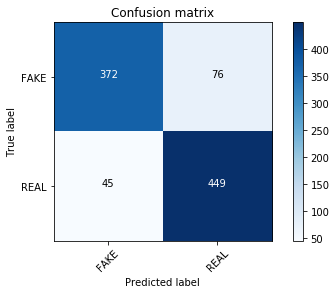

In [16]:
from sklearn.linear_model import PassiveAggressiveClassifier

pass_clf = PassiveAggressiveClassifier(max_iter=50 , random_state = 17)
pass_clf.fit(vector_train, y_train)
pred = pass_clf.predict(vector_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

accuracy:   0.894
Confusion matrix


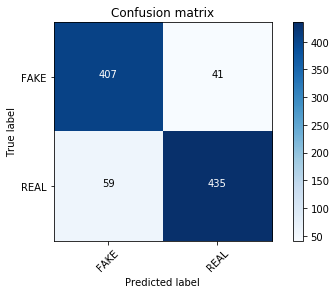

In [17]:
from sklearn import svm
clf_svm = svm.SVC(probability=True, C=1000)
clf_svm.fit(vector_train, y_train)
pred_svm = clf_svm.predict(vector_test)
score = metrics.accuracy_score(y_test, pred_svm)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred_svm, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

accuracy:   0.869
Confusion matrix


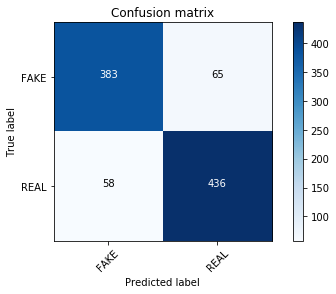

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf_rand = RandomForestClassifier(n_estimators = 26 , criterion = 'entropy' , random_state = 0)
clf_rand.fit(vector_train, y_train)
pred_rand = clf_rand.predict(vector_test)
score = metrics.accuracy_score(y_test, pred_rand)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred_rand, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

accuracy:   0.900
Confusion matrix


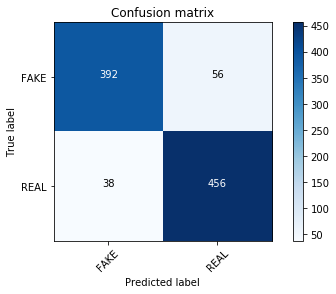

In [19]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(np.array(vector_train) , y_train)
pred = clf.predict(np.array(vector_test))

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])